In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
import matplotlib.pyplot as plt
import shap
shap.initjs()
import ipywidgets as widgets
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=np.inf)

In [2]:
dir_final_save  = 'D:/rohan/thesis/Projects/Machine_Learning/Data/Combined_Data/'
dir_block_save  = 'D:/rohan/thesis/Projects/Machine_Learning/Data/Combined_Data/Blockwise/'
dir_blisk_save  = 'D:/rohan/thesis/Projects/Machine_Learning/Data/Combined_Data/Blisk/'

In [4]:
print('Enter 1 for single file training, 2 for blockwise training, 3 for full-blisk training')

def single():
    dir_final_save  = 'D:/rohan/thesis/Projects/Machine_Learning/Data/Combined_Data/'
    print('Input block number and angle')
    block = input()
    angle = input()
    df = pd.read_excel(str(dir_final_save)+'finaldf_forward_with_compensation'+str(block)+'__'+str(int(angle))+'.xlsx', engine='openpyxl')
    print(df.shape)
    return df

def block():
    dir_block_save  = 'D:/rohan/thesis/Projects/Machine_Learning/Data/Combined_Data/Blockwise/'
    print('Input block number')
    block = input()
    
    df = pd.DataFrame()
    with open(str(dir_block_save)+str(block)+'.csv') as fl:
        chunk_iter = pd.read_csv(fl, chunksize = 1000)
        for chunk in chunk_iter:
            df = pd.concat([df,chunk])
    
    print(df.shape)
    return df
    
def blisk():
    dir_blisk_save  = 'D:/rohan/thesis/Projects/Machine_Learning/Data/Combined_Data/Blisk/'
    
    df = pd.DataFrame()
    with open(str(dir_blisk_save)+'cleaned_full_blisk'+'.csv') as fl:
        chunk_iter = pd.read_csv(fl, chunksize = 1000)
        for chunk in chunk_iter:
            df = pd.concat([df,chunk])
    
    
    print(df.shape)
    return df
    
switch = { 
           1 : single,
           2 : block,
           3 : blisk,
          }

df = switch[int(input())]()

Enter 1 for single file training, 2 for blockwise training, 3 for full-blisk training
1
Input block number and angle
1030
36
(19300, 75)


In [5]:
print(df.columns, len(df.columns))
df.iloc[0:5]

Index(['Leading angle', 'Side tilt angle', 'Surface Contact point X',
       'Surface contact point Y', 'Surface contact point z',
       'Surface Orietation X', 'Surface Orietation Y', 'Surface Orietation Z',
       'Tool Tip Point X', 'Tool Tip Point Y', 'Tool Tip Point Z',
       'Tool Orientation X', 'Tool Orientation Y', 'Tool Orientation Z',
       'Closes Point Distance (Surface Contact Point - Acquired TCP 1030 blade0)',
       'time', 'MachineX', 'MachineY', 'MachineZ', 'MachineA', 'MachineC',
       'LoadSpindle', 'TransfX', 'TransfY', 'TransfZ', 'TransfI', 'TransfJ',
       'TransfK', 'executionDuration', 'previousExecutionDuration',
       'relativeTimetoPreviousCall program number', 'timeStamp', 'Tool Length',
       'Tool Radius', 'G54-X', 'G54-Y', 'G54-Z', 'G54-A', 'G54-C',
       'ProgNumber', 'Blade', 'Fx_mean', 'Fy_mean', 'Fz_mean', 'Mz_mean',
       'Fc_mean', 'Fa_mean', 'FcN_mean', 'Fres_mean', 'Fx_sigma', 'Fy_sigma',
       'Fz_sigma', 'Mz_sigma', 'Fc_sigma', 'Fa_s

,Leading angle,Side tilt angle,Surface Contact point X,Surface contact point Y,Surface contact point z,Surface Orietation X,Surface Orietation Y,Surface Orietation Z,Tool Tip Point X,Tool Tip Point Y,Tool Tip Point Z,Tool Orientation X,Tool Orientation Y,Tool Orientation Z,Closes Point Distance (Surface Contact Point - Acquired TCP 1030 blade0),time,MachineX,MachineY,MachineZ,MachineA,MachineC,LoadSpindle,TransfX,TransfY,TransfZ,TransfI,TransfJ,TransfK,executionDuration,previousExecutionDuration,relativeTimetoPreviousCall program number,timeStamp,Tool Length,Tool Radius,G54-X,G54-Y,G54-Z,G54-A,G54-C,ProgNumber,Blade,Fx_mean,Fy_mean,Fz_mean,Mz_mean,Fc_mean,Fa_mean,FcN_mean,Fres_mean,Fx_sigma,Fy_sigma,Fz_sigma,Mz_sigma,Fc_sigma,Fa_sigma,FcN_sigma,Fres_sigma,Fx_max,Fy_max,Fz_max,Mz_max,Fc_max,Fa_max,FcN_max,Fres_max,compensation_x,compensation_y,compensation_z,tcp_error,block,angle,Tool Tip Point Machine X,Tool Tip Point Machine Y,Tool Tip Point Machine Z,Tool Point Deviation
0,-0.062716,0.885286,20.347370,220.061294,38.408049,0.429970,0.597149,-0.677155,22.536190,217.658371,34.420971,0.065274,0.997785,-0.012812,6.078886,24.528753,-90.601050,-114.952000,-168.700100,-87.540250,5.669850,10.265909,-109.914571,190.019483,33.884890,-0.248128,-0.308476,0.906170,0.004130,0.003625,0.007500,6.375063e+10,226.4591,6,0,0,-510.483,36,0,1030,-36,0.000000,0.000000,0.145839,0.006053,1.008819,0.000000,0.000000,0.145839,0.000000,0.000000,0.499276,0.004687,0.781195,0.000000,0.000000,0.499276,0.000000,0.000000,2.318080,0.021302,3.550316,0.000000,0.000000,2.318080,0.021112,-0.009700,-0.007445,0.881011,1030,36,22.782077,217.515263,33.894984,0.597999
1,-0.064188,0.886066,20.620915,220.035656,38.559893,0.431641,0.596528,-0.676639,22.817738,217.629120,34.573746,0.065613,0.997767,-0.012452,6.078687,23.829168,-90.277733,-114.987533,-168.462767,-87.512533,5.695367,10.266667,-109.694802,190.177319,34.027451,-0.250252,-0.335280,0.894809,0.003169,0.004134,0.006997,6.375063e+10,226.4591,6,0,0,-510.483,36,0,1030,-36,0.000000,0.014763,0.165402,0.006724,1.120651,0.014763,0.014746,0.180165,0.000000,0.204031,0.544525,0.005348,0.891342,0.204031,0.203790,0.621743,0.000000,2.834522,2.481181,0.027747,4.624525,2.834522,2.831178,4.454280,0.021126,-0.009701,-0.007447,0.904599,1030,36,23.052663,217.513951,34.037494,0.596674
2,-0.065477,0.886865,20.902737,220.009180,38.716349,0.431945,0.595986,-0.676923,23.099401,217.599487,34.726257,0.065942,0.997750,-0.012077,6.078577,26.690002,-91.557100,-114.385500,-168.726000,-87.299900,5.256900,10.254545,-109.444944,190.199432,34.156223,-0.527615,-0.319512,0.787105,0.002334,0.002089,0.011815,6.375063e+10,226.4591,6,0,0,-510.483,36,0,1030,-36,0.021032,0.138332,0.218325,0.005779,0.963217,0.159364,0.158509,0.377689,0.375650,1.098854,0.628277,0.004107,0.684583,1.158781,1.152592,1.291480,6.730357,9.382722,2.577007,0.017372,2.895280,9.382722,9.372509,9.382722,0.021114,-0.009728,-0.007452,0.829445,1030,36,23.267708,217.387483,34.165590,0.622592
3,-0.067317,0.887662,21.173836,219.982951,38.866988,0.433995,0.595344,-0.676176,23.380888,217.569519,34.879044,0.066262,0.997734,-0.011689,6.079730,24.136003,-90.383100,-114.719320,-168.198460,-87.357400,5.524960,10.255455,-109.228088,190.433810,34.313028,-0.390565,-0.378497,0.816536,0.005527,0.004658,0.008089,6.375063e+10,226.4591,6,0,0,-510.483,36,0,1030,-36,0.014284,0.013416,0.175830,0.006335,1.055783,0.027699,0.026899,0.203530,0.139241,0.151214,0.563662,0.004871,0.811819,0.290455,0.282511,0.709226,1.395337,1.749214,2.607112,0.021572,3.595398,3.144552,3.045786,4.703970,0.021143,-0.009716,-0.007454,0.903156,1030,36,23.580915,217.446545,34.323164,0.603437
4,-0.069583,0.889274,21.738093,219.927811,39.180602,0.434430,0.594327,-0.676791,23.944086,217.508453,35.184048,0.066873,0.997702,-0.010869,6.078776,25.300003,-90.928067,-114.201333,-167.995967,-87.117833,5.204733,10.230303,-108.678190,190.700871,34.641541,-0.644226,-0.329915,0.660711,0.004493,0.006186,0.007715,6.375063e+10,226.4591,6,0,0,-510.483,36,

In [18]:
def data(df):
    X = df.drop(['Tool Point Deviation','Tool Tip Point Machine X', 'Tool Tip Point Machine Y',
       'Tool Tip Point Machine Z',], axis=1).copy(deep=True).to_numpy(dtype=np.float64)
    y = df['Tool Point Deviation'].copy(deep=True).to_numpy(dtype=np.float64)
    return X,y

In [19]:
X_raw,y_raw = data(df)

In [20]:
# Normalization

scaler1 = MinMaxScaler(feature_range=(0,1))
scaler1.fit(X_raw)
X_scaled = scaler1.transform(X_raw)
# scaler1.inverse_transform(X_scaled)

scaler2 = MinMaxScaler(feature_range=(0,1))
scaler2.fit(y_raw[:,np.newaxis])
y_scaled = scaler2.transform(y_raw[:,np.newaxis])
# scaler2.inverse_transform(y_scaled)

In [27]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
        
    return np.array(X), np.array(y)

In [29]:
dataset = np.hstack((X_scaled, y_scaled))
print(dataset.shape)
n_steps = 50

X, y = split_sequences(dataset, n_steps)

print(X.shape, y.shape)

(19300, 72)
(19251, 50, 71) (19251,)


In [33]:
n_features = X.shape[2]
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                24400     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 24,451
Trainable params: 24,451
Non-trainable params: 0
_________________________________________________________________


In [44]:
X.shape

(19251, 50, 71)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(12898, 50, 71) (12898,) (6353, 50, 71) (6353,)


In [46]:
model.compile(
    loss = tf.keras.losses.MeanSquaredError(reduction="auto", name="mse"),
    #loss = tf.keras.losses.Huber(name='huber_loss'),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = [tf.keras.metrics.MeanSquaredError(),tf.keras.metrics.RootMeanSquaredError()],
             )

In [47]:
early_stopping = EarlyStopping(monitor='val_loss', patience=100, mode='min')
model_checkpoint = ModelCheckpoint('custom_model.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)

In [60]:
history = model.fit(X_train, y_train, epochs=1000,validation_data=(X_test,y_test), verbose=1,callbacks=[early_stopping,model_checkpoint], batch_size = 100)

Epoch 1/1000
129/129 [==============================] - 3s 20ms/step - loss: 3.8343e-04 - mean_squared_error: 3.8343e-04 - root_mean_squared_error: 0.0196 - val_loss: 3.8189e-04 - val_mean_squared_error: 3.8189e-04 - val_root_mean_squared_error: 0.0195

Epoch 00001: val_loss improved from 0.00038 to 0.00038, saving model to custom_model.h5
Epoch 2/1000
129/129 [==============================] - 3s 22ms/step - loss: 3.6681e-04 - mean_squared_error: 3.6681e-04 - root_mean_squared_error: 0.0192 - val_loss: 4.0009e-04 - val_mean_squared_error: 4.0009e-04 - val_root_mean_squared_error: 0.0200

Epoch 00002: val_loss did not improve from 0.00038
Epoch 3/1000
129/129 [==============================] - 3s 22ms/step - loss: 3.7784e-04 - mean_squared_error: 3.7784e-04 - root_mean_squared_error: 0.0194 - val_loss: 4.1620e-04 - val_mean_squared_error: 4.1620e-04 - val_root_mean_squared_error: 0.0204

Epoch 00003: val_loss did not improve from 0.00038
Epoch 4/1000
129/129 [==========================


Epoch 00027: val_loss did not improve from 0.00038
Epoch 28/1000
129/129 [==============================] - 3s 20ms/step - loss: 6.0189e-04 - mean_squared_error: 6.0189e-04 - root_mean_squared_error: 0.0245 - val_loss: 5.6764e-04 - val_mean_squared_error: 5.6764e-04 - val_root_mean_squared_error: 0.0238

Epoch 00028: val_loss did not improve from 0.00038
Epoch 29/1000
129/129 [==============================] - 3s 20ms/step - loss: 5.8828e-04 - mean_squared_error: 5.8828e-04 - root_mean_squared_error: 0.0243 - val_loss: 6.1152e-04 - val_mean_squared_error: 6.1152e-04 - val_root_mean_squared_error: 0.0247

Epoch 00029: val_loss did not improve from 0.00038
Epoch 30/1000
129/129 [==============================] - 3s 20ms/step - loss: 5.6946e-04 - mean_squared_error: 5.6946e-04 - root_mean_squared_error: 0.0239 - val_loss: 5.7533e-04 - val_mean_squared_error: 5.7533e-04 - val_root_mean_squared_error: 0.0240

Epoch 00030: val_loss did not improve from 0.00038
Epoch 31/1000
129/129 [=======


Epoch 00054: val_loss did not improve from 0.00038
Epoch 55/1000
129/129 [==============================] - 3s 22ms/step - loss: 5.4879e-04 - mean_squared_error: 5.4879e-04 - root_mean_squared_error: 0.0234 - val_loss: 5.2497e-04 - val_mean_squared_error: 5.2497e-04 - val_root_mean_squared_error: 0.0229

Epoch 00055: val_loss did not improve from 0.00038
Epoch 56/1000
129/129 [==============================] - 3s 21ms/step - loss: 5.2511e-04 - mean_squared_error: 5.2511e-04 - root_mean_squared_error: 0.0229 - val_loss: 5.6931e-04 - val_mean_squared_error: 5.6931e-04 - val_root_mean_squared_error: 0.0239

Epoch 00056: val_loss did not improve from 0.00038
Epoch 57/1000
129/129 [==============================] - 3s 21ms/step - loss: 5.2883e-04 - mean_squared_error: 5.2883e-04 - root_mean_squared_error: 0.0230 - val_loss: 5.5072e-04 - val_mean_squared_error: 5.5072e-04 - val_root_mean_squared_error: 0.0235

Epoch 00057: val_loss did not improve from 0.00038
Epoch 58/1000
129/129 [=======


Epoch 00081: val_loss did not improve from 0.00038
Epoch 82/1000
129/129 [==============================] - 3s 21ms/step - loss: 5.3105e-04 - mean_squared_error: 5.3105e-04 - root_mean_squared_error: 0.0230 - val_loss: 5.0863e-04 - val_mean_squared_error: 5.0863e-04 - val_root_mean_squared_error: 0.0226

Epoch 00082: val_loss did not improve from 0.00038
Epoch 83/1000
129/129 [==============================] - 3s 21ms/step - loss: 5.8280e-04 - mean_squared_error: 5.8280e-04 - root_mean_squared_error: 0.0241 - val_loss: 6.4712e-04 - val_mean_squared_error: 6.4712e-04 - val_root_mean_squared_error: 0.0254

Epoch 00083: val_loss did not improve from 0.00038
Epoch 84/1000
129/129 [==============================] - 3s 22ms/step - loss: 5.2177e-04 - mean_squared_error: 5.2177e-04 - root_mean_squared_error: 0.0228 - val_loss: 5.1354e-04 - val_mean_squared_error: 5.1354e-04 - val_root_mean_squared_error: 0.0227

Epoch 00084: val_loss did not improve from 0.00038
Epoch 85/1000
129/129 [=======

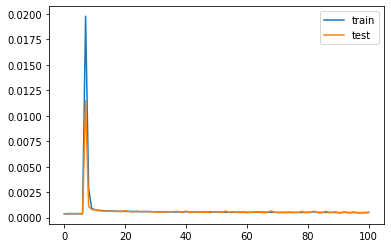

In [61]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')

plt.legend()
plt.show()


In [62]:
y_pred = model.predict(X_test)

In [63]:
for i in np.arange(X_test.shape[0]):
    print(i,y_test[i], y_pred[i])

0 0.13399174517464632 [0.09031329]
1 0.07732496804548944 [0.07503079]
2 0.9762077521368113 [0.9688921]
3 0.4866898973321519 [0.48041874]
4 0.07050839320154029 [0.08792944]
5 0.10259970107408847 [0.06945604]
6 0.9853083908364958 [0.9880326]
7 0.2698304342241303 [0.25290975]
8 0.2166589603867803 [0.20850883]
9 0.10196288938835932 [0.07042527]
10 0.1584066200929959 [0.15369143]
11 0.31603562054020456 [0.30718943]
12 0.06232832908710212 [0.05590889]
13 0.2719531464464139 [0.26462457]
14 0.05273769482431021 [0.04715912]
15 0.11804970265180226 [0.06706642]
16 0.15321194238870137 [0.13743395]
17 0.051216835782796385 [0.08135806]
18 0.03670562614807138 [0.05164406]
19 0.1465532403289008 [0.15226497]
20 0.1057277557792378 [0.07108718]
21 0.24597564874516142 [0.25052392]
22 0.6601210131353138 [0.6558812]
23 0.1411114080645012 [0.1308954]
24 0.19463133392352394 [0.1609613]
25 0.0961479670958745 [0.11501583]
26 0.18601514756696755 [0.14891264]
27 0.062306250122676085 [0.07393923]
28 0.101060537549

889 0.07620836426215266 [0.05291441]
890 0.18528678175309102 [0.16386524]
891 0.0224668679969533 [0.04251225]
892 0.050278708502000106 [0.05628721]
893 0.09350229724379347 [0.09700675]
894 0.09289831918446946 [0.0866276]
895 0.06893289056225735 [0.05563752]
896 0.0456027939342701 [0.05544075]
897 0.16358236850419244 [0.15064168]
898 0.13489413470287814 [0.14511947]
899 0.06962813335511367 [0.06859417]
900 0.08836725949419433 [0.0744783]
901 0.43765247046871203 [0.430648]
902 0.04827659651832463 [0.06586521]
903 0.10741275528059809 [0.07084213]
904 0.09012112297213415 [0.08687749]
905 0.05741960819356363 [0.054421]
906 0.1906265904583059 [0.18990956]
907 0.017270681350536582 [0.05145246]
908 0.056486409647604686 [0.05621463]
909 0.09747242777307003 [0.10630022]
910 0.22226535763117666 [0.20759663]
911 0.6204187775058344 [0.61517674]
912 0.20390783758269687 [0.16128826]
913 0.05341760658403277 [0.0665807]
914 0.3187510578987602 [0.31913605]
915 0.17751618868588373 [0.15312599]
916 0.0579

1614 0.1559460746141858 [0.16724916]
1615 0.09381965927490318 [0.07862455]
1616 0.17568529787266676 [0.18609314]
1617 0.2528364949408124 [0.23606709]
1618 0.1295604407108576 [0.12538935]
1619 0.6390907689397284 [0.6314512]
1620 0.28460824534925366 [0.28243273]
1621 0.4387364732246981 [0.42624912]
1622 0.3643128932619421 [0.34915346]
1623 0.24104343496135963 [0.21749318]
1624 0.28772393913288585 [0.26979765]
1625 0.09661448337453041 [0.09658859]
1626 0.11547114366101928 [0.09070058]
1627 0.13835877615025477 [0.07179316]
1628 0.9056138744573179 [0.8970752]
1629 0.10092107740081743 [0.06253754]
1630 0.0975287728416104 [0.09948143]
1631 0.2962230013606373 [0.30329573]
1632 0.09427457695546052 [0.07681297]
1633 0.025344641110263036 [0.07433023]
1634 0.9312674449976316 [0.91659653]
1635 0.1754086760126666 [0.15392666]
1636 0.12450318984002129 [0.09280536]
1637 0.0896590957470934 [0.09025096]
1638 0.03209136929349517 [0.06801823]
1639 0.2917390420204595 [0.28537968]
1640 0.14814703110414462 [

2401 0.042453429711096904 [0.06042631]
2402 0.5754596432957977 [0.5627867]
2403 0.03037211085772159 [0.06167714]
2404 0.06287175681550353 [0.06371278]
2405 0.8911692078951294 [0.8834273]
2406 0.9922184633892117 [0.982758]
2407 0.06217982497492426 [0.07424983]
2408 0.09112351305399691 [0.10135035]
2409 0.30282215287043746 [0.31167087]
2410 0.08035394529004979 [0.0854483]
2411 0.1757191125206481 [0.15515588]
2412 0.16911953318920928 [0.1413633]
2413 0.20617481354496467 [0.15985309]
2414 0.1783676235970675 [0.16050784]
2415 0.11685387431308289 [0.07126754]
2416 0.08642523375179342 [0.05862218]
2417 0.7637702858097563 [0.7617459]
2418 0.08908909024093256 [0.05947473]
2419 0.05535341126510996 [0.05411938]
2420 0.8201653416861165 [0.8188287]
2421 0.1378278464781448 [0.07853584]
2422 0.6588196923232869 [0.6553119]
2423 0.062033414577273516 [0.09198952]
2424 0.16056480553547062 [0.13364297]
2425 0.0938319544333644 [0.09518917]
2426 0.18620248195353614 [0.15890768]
2427 0.17136751671928946 [0.1

3184 0.44467911342403804 [0.43943998]
3185 0.27138530040079295 [0.27499452]
3186 0.13146494584574162 [0.08440658]
3187 0.05088410664993095 [0.09971073]
3188 0.12409164036767761 [0.10677791]
3189 0.2469417303576642 [0.24390809]
3190 0.16281399439482744 [0.14113207]
3191 0.07143785648724436 [0.05857163]
3192 0.11819170851314974 [0.11521876]
3193 0.05917845889123606 [0.06240114]
3194 0.10454728815081181 [0.07832679]
3195 0.2153457998688341 [0.22192208]
3196 0.05872959639466363 [0.06504813]
3197 0.14150330845434064 [0.15640482]
3198 0.10277241270330618 [0.08814426]
3199 0.22270135783901737 [0.20287147]
3200 0.06870851725388404 [0.06314086]
3201 0.08517345185270003 [0.08792674]
3202 0.040700101856011126 [0.05257401]
3203 0.1607990163073551 [0.14278102]
3204 0.06367180428880616 [0.07244411]
3205 0.10908746981824638 [0.11008063]
3206 0.07829279015216974 [0.09057176]
3207 0.06886248138982316 [0.07388177]
3208 0.04942613151443276 [0.045728]
3209 0.024707659994941587 [0.04322079]
3210 0.16611831

4128 0.13692236287776838 [0.13727355]
4129 0.0895575037844077 [0.05135633]
4130 0.11567931985941621 [0.09011594]
4131 0.06417846285415713 [0.07051246]
4132 0.13445195159200518 [0.13161592]
4133 0.3603262528333668 [0.33528963]
4134 0.028384693608064678 [0.07415525]
4135 0.22102260415752664 [0.22664319]
4136 0.12811292689832227 [0.12897205]
4137 0.16092140002335625 [0.17128122]
4138 0.9450059593918619 [0.92550606]
4139 0.1390252904888103 [0.13787836]
4140 0.03334238697275284 [0.06431721]
4141 0.05661038731955702 [0.0609589]
4142 0.03830395115916092 [0.04627702]
4143 0.8558113454094445 [0.85574055]
4144 0.09567386664018115 [0.11161233]
4145 0.10265074316863607 [0.06417406]
4146 0.07336223937728605 [0.06080539]
4147 0.09817832378890677 [0.06466024]
4148 0.10552691319979415 [0.06260614]
4149 0.08345204310554273 [0.05711836]
4150 0.09559789982905212 [0.06223235]
4151 0.004077006409056377 [0.07065851]
4152 0.23762730309232008 [0.22010335]
4153 0.2032846968755892 [0.2095807]
4154 0.09802441222

4871 0.9372870504410391 [0.934011]
4872 0.06989599138647692 [0.05544356]
4873 0.7276325799052027 [0.7259577]
4874 0.07351533366109753 [0.07515206]
4875 0.24577487911012028 [0.24571206]
4876 0.5324975978597338 [0.50673383]
4877 0.09177676098873268 [0.09789723]
4878 0.5805617045260693 [0.5852465]
4879 0.02981343256130395 [0.05731887]
4880 0.5450812023139545 [0.52944237]
4881 0.12363436857206864 [0.07482053]
4882 0.09605480086439243 [0.06741252]
4883 0.3708515797847225 [0.361982]
4884 0.963318733929555 [0.94725484]
4885 0.06664411632738237 [0.08596662]
4886 0.06828448512284929 [0.07589097]
4887 0.11684549052188205 [0.11651162]
4888 0.32334036424902474 [0.31542546]
4889 0.09620738988073373 [0.06610648]
4890 0.07482895236583767 [0.05174643]
4891 0.08570465547125677 [0.0713808]
4892 0.06922132769872864 [0.05148518]
4893 0.19622520365547078 [0.14267075]
4894 0.14923466882178624 [0.13733315]
4895 0.9604854031494306 [0.94814736]
4896 0.712613595456064 [0.6944193]
4897 0.04870182077596778 [0.055

5674 0.2578497052312574 [0.2348839]
5675 0.0927388100192823 [0.05575252]
5676 0.06206322032511222 [0.06949262]
5677 0.07126295391179535 [0.06934603]
5678 0.05986299354607101 [0.04805591]
5679 0.7207488734366664 [0.7176305]
5680 0.1977120722072475 [0.18643075]
5681 0.3033415533004463 [0.30883458]
5682 0.048325164480269765 [0.05890748]
5683 0.17038577522435147 [0.11710713]
5684 0.7378815973665517 [0.72058207]
5685 0.055807908523263665 [0.05449301]
5686 0.04803546779611248 [0.0877037]
5687 0.18730954051560203 [0.17839292]
5688 0.05609539883946441 [0.07521826]
5689 0.7432538231900112 [0.74822897]
5690 0.12002306362387209 [0.10385274]
5691 0.08670177751981903 [0.12204625]
5692 0.07318601337705365 [0.10013929]
5693 0.20423740675436042 [0.18916082]
5694 0.11831018525935344 [0.11498079]
5695 0.13630791904379172 [0.14320247]
5696 0.04155465712571492 [0.04622503]
5697 0.09245823920606704 [0.08905256]
5698 0.9889667685882723 [0.97446406]
5699 0.10799551567525902 [0.09482218]
5700 0.34434907898090

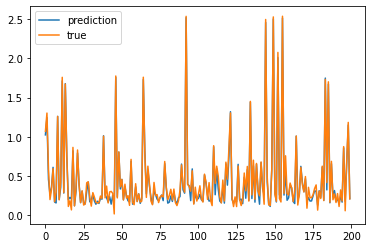

In [65]:
plt.plot(scaler2.inverse_transform(y_pred[1800:2000]), label='prediction')
plt.plot(scaler2.inverse_transform(y_test[1800:2000].reshape(-1,1)), label='true')
plt.legend()